### forge 데이터셋

In [2]:
!pip install mglearn

  Created wheel for mglearn: filename=mglearn-0.1.9-py2.py3-none-any.whl size=582639 sha256=85f32cc48383ac672b43b6fb3ef5b990390b1028fef44f3ab39f94a3dc5de1c5
  Stored in directory: c:\users\user\appdata\local\pip\cache\wheels\df\30\8a\1e2c8f144c9d411b0688f628d496d2db8f61b6d14bcedaa1df
Successfully built mglearn


In [3]:
import mglearn

In [4]:
x, y = mglearn.datasets.make_forge()

C:\Users\user\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function make_blobs is deprecated; Please import make_blobs directly from scikit-learn
  warnings.warn(msg, category=FutureWarning)


In [6]:
import matplotlib.pyplot as plt
from matplotlib import rc

In [7]:
plt.rc('font', family='Malgun Gothic')
plt.rcParams['axes.unicode_minus'] = False

x.shape (26, 2)


(26, 2)

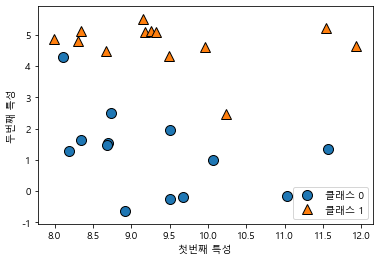

In [8]:
mglearn.discrete_scatter(x[:,0], x[:,1], y)
plt.legend(['클래스 0','클래스 1'], loc=4)
plt.xlabel('첫번째 특성')
plt.ylabel('두번째 특성')
print('x.shape', x.shape)
x.shape

### wave 데이터셋

In [9]:
x, y = mglearn.datasets.make_wave(n_samples=40)

Text(0, 0.5, '타깃')

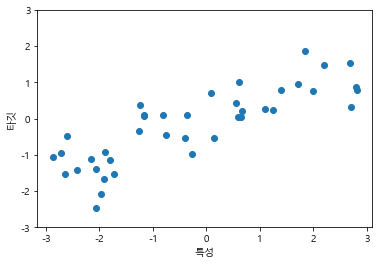

In [10]:
plt.plot(x, y, 'o') #o: o표시로 나타냄
plt.ylim(-3,3)
plt.xlabel('특성')
plt.ylabel('타깃')
#데이터가 소수로 존재

### 유방암 데이터

In [11]:
from sklearn.datasets import load_breast_cancer

In [13]:
cancer = load_breast_cancer()

In [14]:
print('cancer.keys():', cancer.keys())

cancer.keys(): dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])


In [15]:
print('유방암 데이터의 형태:', cancer.data.shape)
#569개의 데이터, 30개의 column(특성)

유방암 데이터의 형태: (569, 30)


In [16]:
import numpy as np

In [17]:
print('클래스별 샘플 개수:', {n: v for n, v in zip(cancer.target_names, np.bincount(cancer.target))})

클래스별 샘플 개수: {'malignant': 212, 'benign': 357}


In [18]:
print('특성 이름:', cancer.feature_names)

특성 이름: ['mean radius' 'mean texture' 'mean perimeter' 'mean area'
 'mean smoothness' 'mean compactness' 'mean concavity'
 'mean concave points' 'mean symmetry' 'mean fractal dimension'
 'radius error' 'texture error' 'perimeter error' 'area error'
 'smoothness error' 'compactness error' 'concavity error'
 'concave points error' 'symmetry error' 'fractal dimension error'
 'worst radius' 'worst texture' 'worst perimeter' 'worst area'
 'worst smoothness' 'worst compactness' 'worst concavity'
 'worst concave points' 'worst symmetry' 'worst fractal dimension']


### 보스턴 주택

In [19]:
from sklearn.datasets import load_boston

In [20]:
boston = load_boston()

C:\Users\user\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np


        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets include the California housing dataset (i

In [21]:
print('데이터의 형태:', boston.data.shape)
#506개의 데이터, 13개의 특성으로 구성

데이터의 형태: (506, 13)


In [22]:
print('특성 이름:', boston.feature_names)

특성 이름: ['CRIM' 'ZN' 'INDUS' 'CHAS' 'NOX' 'RM' 'AGE' 'DIS' 'RAD' 'TAX' 'PTRATIO'
 'B' 'LSTAT']


In [23]:
x, y = mglearn.datasets.load_extended_boston()
print('x.shape', x.shape)
#mglearn : 모든 데이터에 사용할 수는 없음

x.shape (506, 104)


### 분류모델

In [24]:
from sklearn.model_selection import train_test_split
from sklearn import metrics

In [25]:
x, y = mglearn.datasets.make_forge()

C:\Users\user\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function make_blobs is deprecated; Please import make_blobs directly from scikit-learn
  warnings.warn(msg, category=FutureWarning)


In [26]:
x_train, x_test, y_train, y_test = train_test_split(x, y, random_state=0)
#random_state : 데이터의 배열 고정

In [27]:
from sklearn.neighbors import KNeighborsClassifier

In [28]:
clf = KNeighborsClassifier(n_neighbors = 3)

In [29]:
clf.fit(x_train, y_train)

KNeighborsClassifier(n_neighbors=3)

In [30]:
pred = clf.predict(x_test)

In [31]:
print(pred)

[1 0 1 0 1 0 0]


In [32]:
clf.score(x_test, y_test)
#score함수: accuracy(정확도) 구하기 위함
#score = accuracy 라고 봐도 무방함

0.8571428571428571

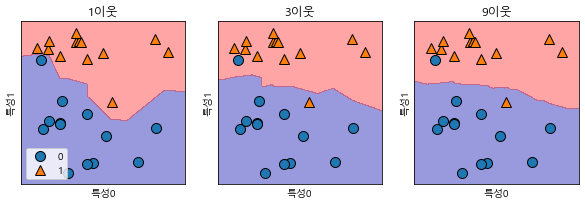

In [34]:
gif, axes = plt.subplots(1,3, figsize=(10,3))

for n_neighbors, ax in zip([1,3,9], axes) : 
    
    clf = KNeighborsClassifier(n_neighbors).fit(x, y)
    mglearn.plots.plot_2d_separator(clf, x, fill=True, eps=0.5, ax=ax, alpha=.4)
    mglearn.discrete_scatter(x[:,0], x[:,1], y, ax=ax)
    ax.set_title('{}이웃'.format(n_neighbors))
    ax.set_xlabel('특성0')
    ax.set_ylabel('특성1')
axes[0].legend(loc=3)
#경계가 부드러워진다 -> 일반화 -> 너무 부드러우면 과소적합일 수 있음